# Lesson 3 Codealong

In [1]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

### Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### Read in the examples

In [2]:
df = pd.DataFrame({
    'example1': [18, 24, 17, 21, 24, 16, 29, 18],
    'example2': [75, 87, 49, 68, 75, 84, 98, 92],
    'example3': [55, 47, 38, 66, 56, 64, 44, 39]})
df

,example1,example2,example3
0,18,75,55
1,24,87,47
2,17,49,38
3,21,68,66
4,24,75,56
5,16,84,64
6,29,98,44
7,18,92,39


#### Instructor example: Calculate the mean for each coloumn

In [3]:
df.mean()

example1    20.875
example2    78.500
example3    51.125
dtype: float64

#### Students: Calculate median, mode, max, min for example

Note: All answers should match your hand calculations

In [4]:
#maximum
df.max()

example1    29
example2    98
example3    66
dtype: int64

In [5]:
#minimum
df.min()

example1    16
example2    49
example3    38
dtype: int64

In [6]:
#median
df.median()

example1    19.5
example2    79.5
example3    51.0
dtype: float64

In [7]:
#mode
df.mode()

,example1,example2,example3
0,18,75.0,NaN
1,24,NaN,NaN


### Part 2. Box Plot

#### Instructor: Interquartile range 

In [8]:
print "50% Quartile:"
print df.quantile(.50)
print

print "Median (red line of the box)"
print df.median()

50% Quartile:
example1    19.5
example2    79.5
example3    51.0
dtype: float64

Median (red line of the box)
example1    19.5
example2    79.5
example3    51.0
dtype: float64


In [9]:
print"25% (bottom of the box)"
print df.quantile(0.25)
print

print"75% (top of the box)"
print df.quantile(0.75)

25% (bottom of the box)
example1    17.75
example2    73.25
example3    42.75
dtype: float64

75% (top of the box)
example1    24.00
example2    88.25
example3    58.00
dtype: float64


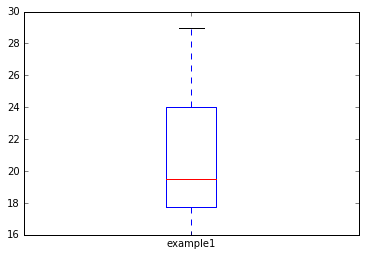

In [10]:
df['example1'].plot(kind='box')

#### Student: Create plots for examples 2 and 3 and check the quartiles

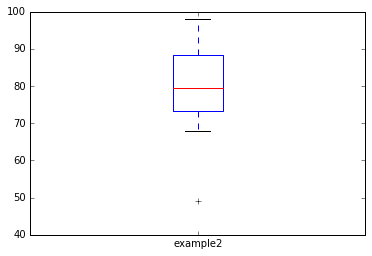

In [11]:
df['example2'].plot(kind='box')

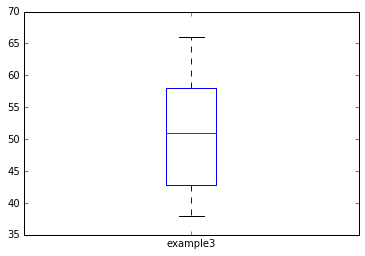

In [12]:
df['example3'].plot(kind='box')

#### What does the cross in example 2 represent?

Answer: Outlier.

### Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** The square root of the variance

<img(src='./media/biasVsVarianceImage.png', style="width: 30%; height: 30%")>

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first. 
<img(src='./media/samplevarstd.png', style="width: 50%; height: 50%")>

In [13]:
#example1
mean = df["example1"].mean()
n= df["example1"].count()

print df["example1"]
print mean
print n

0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: example1, dtype: int64
20.875
8


In [14]:
# written out by hand for instructional purposes 
# if there is time, have the students refactor this to create a function to calculate variance for any dataset
# find the squared distance from the mean

obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7

# sum each observation's squared distance from the mean 
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
denominator = n - 1
variance = numerator/denominator
print numerator 
print denominator
print variance


8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625
140.875
7
20.125


In [15]:
# in pandas
print "Variance"
print df["example1"].var()

Variance
20.125


#### Students: Calculate the standard deviation by hand for each sample

Recall that the standard deviation is the square root of the variance. 

In [16]:
# find the variance for each dataset
for col in list(df.columns.values):
    variances=0
    for value in df[col]:
        variances = variances + ((value - df[col].mean())**2)
    print col,'variance', variances/(df[col].count()-1)

example1 variance 20.125
example2 variance 238.571428571
example3 variance 116.125


In [17]:
# calculate standard deviation by hand
from math import sqrt
for col in list(df.columns.values):
    variances=[]
    for value in df[col]:
        variances.append((value - df[col].mean())**2)
    print col, 'standard deviation',sqrt(sum(variances)/(len(variances)-1))

example1 standard deviation 4.48608961123
example2 standard deviation 15.4457576237
example3 standard deviation 10.7761310311


In [18]:
# now do it with pandas!
print 'variance:'
print df.var()
print
print 'standard deviation:'
print df.std()

variance:
example1     20.125000
example2    238.571429
example3    116.125000
dtype: float64

standard deviation:
example1     4.486090
example2    15.445758
example3    10.776131
dtype: float64


#### Short Cut!

In [19]:
df.describe()

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000


#### Student: Check understanding 
Which value in the above table is the median? 

Answer: The '50%' row.

### Part 4: Correlation

In [20]:
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000


In [23]:
anscombe = pd.read_csv('./resources/anscombe.csv',low_memory=False)
anscombe = anscombe.drop('Unnamed: 0', axis=1)
anscombe

,x,x4,y1,y2,y3,y4
0,10,8,8.04,9.14,7.46,6.58
1,8,8,6.95,8.14,6.77,5.76
2,13,8,7.58,8.74,12.74,7.71
3,9,8,8.81,8.77,7.11,8.84
4,11,8,8.33,9.26,7.81,8.47
5,14,8,9.96,8.10,8.84,7.04
6,6,8,7.24,6.13,6.08,5.25
7,4,19,4.26,3.10,5.39,12.50
8,12,8,10.84,9.13,8.15,5.56
9,7,8,4.82,7.26,6.42,7.91


In [24]:
anscombe.describe()

,x,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


Visually from creating the data frame you can tell the data looks different, yet in the .describe() call, the data shares very similar features. The two primary plotting tools we uses from matplotlib are histograms and scatterplots, which help us understand the shape of data.

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


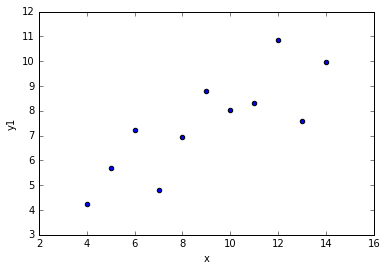

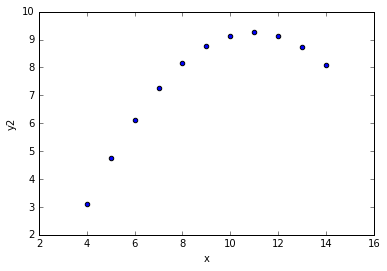

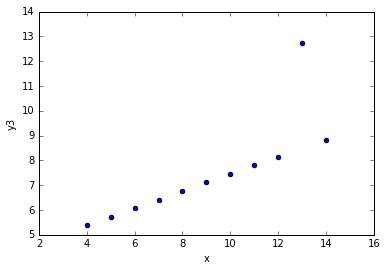

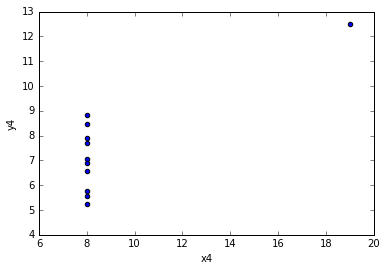

In [25]:
# Visualise
for y in ['y1', 'y2', 'y3', 'y4']:
    if y != 'y4':
        print anscombe.plot(kind='scatter', x='x', y=y)
    else:
        print anscombe.plot(kind='scatter', x='x4', y=y)

Visualising is critical sometimes! ALL four of above plots have:
  - mean(x) = 9
  - var(x) = 11
  - mean(y) = 7.50
  - var(y) = 4.12
  - corr(x, y) = 0.816
  - Linear regresion for all is `y = 3 + 0.5*x`

Created in 1973 by statistician Francis Anscombe to demonstrate the importance of graphing data before analyzing it. Read more: https://en.wikipedia.org/wiki/Anscombe%27s_quartet